In [1]:
%reload_ext autoreload
%autoreload 2

In [7]:
from loren_frank_data_processing import (make_epochs_dataframe,
                                         make_neuron_dataframe)
from src.parameters import _BRAIN_AREAS, ANIMALS

epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info = neuron_info.loc[
    (neuron_info.type == 'principal') &
    (neuron_info.numspikes > 100) &
    neuron_info.area.isin(_BRAIN_AREAS)]
n_neurons = (neuron_info
             .groupby(['animal', 'day', 'epoch'])
             .neuron_id
             .agg(len)
             .rename('n_neurons')
             .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
              .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB', 'wtrack']))
animal = epoch_info.reset_index('animal').set_index(epoch_info.index).animal

epoch_info = epoch_info.loc[(is_w_track & (epoch_info.n_neurons > 9)) |
                            (is_w_track & (animal == 'remy'))]

In [8]:
from loren_frank_data_processing import get_position_dataframe
import numpy as np

speed = np.concatenate([np.asarray(get_position_dataframe(epoch_key, ANIMALS, skip_linearization=True).speed)
                        for epoch_key in epoch_info.index])

In [108]:
from src.parameters import PROCESSED_DATA_DIR
import os


np.save(os.path.join(PROCESSED_DATA_DIR, 'animal_speed.npy'), speed)

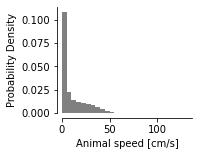

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.figure_utilities import PAGE_HEIGHT, TWO_COLUMN, save_figure
from src.parameters import FIGURE_DIR
import os

fig, ax = plt.subplots(1, 1, figsize=(TWO_COLUMN / 3, PAGE_HEIGHT / 5))
ax.hist(speed, bins=np.arange(0, 150, 5), density=True, color='grey')
ax.set_xlabel('Animal speed [cm/s]')
ax.set_ylabel('Probability Density')
ax.set_xlim((0, speed.max()))
sns.despine(offset=5)

fig_dir = os.path.join(FIGURE_DIR, 'Figure5')
os.makedirs(fig_dir, exist_ok=True)
save_figure(os.path.join(fig_dir, 'animal_speed'))

In [15]:
np.median(speed)

3.762017048965924

In [16]:
np.median(speed[speed > 4])

17.263628386826394

In [21]:
speed.max()

136.7468502001169

In [64]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2).fit(speed[:, np.newaxis])

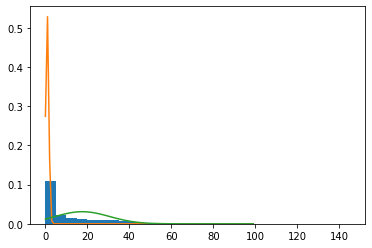

In [65]:
from scipy.stats import multivariate_normal

plt.hist(speed, bins=np.arange(0, 150, 5), density=True);
plt.plot(np.arange(0, 100), multivariate_normal(mean=gmm.means_[0], cov=gmm.covariances_[0]).pdf(np.arange(0, 100)))
plt.plot(np.arange(0, 100), multivariate_normal(mean=gmm.means_[1], cov=gmm.covariances_[1]).pdf(np.arange(0, 100)))

In [66]:
gmm.means_

array([[ 0.86091038],
       [17.57071021]])

In [86]:
np.arange(5)

array([0, 1, 2, 3, 4])

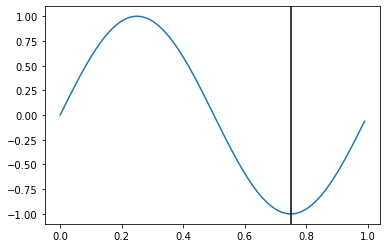

In [102]:
n_samples = 100
time = np.arange(n_samples) / n_samples
freq = 1
phase_offset = 0

plt.plot(time, np.sin(freq * 2 * np.pi * time - phase_offset))
plt.axvline(0.75, color='black')